In [68]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import re
import pickle
from matplotlib import pyplot as plt

## Feature Extraction

#### Baseline

This baseline builds a feature set by pulling pairs of images and creating a difference of the image histograms they produce. The assumption is that files are contained in some input directory in the form patientX-1.jpg, patientX-2.jpg

In [69]:
def hist_features(img_path):
    img = cv2.imread(img_path, 0)
    # Based on my research 256 is the value to use for full range
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    return hist.flatten()

def baseline_hist_diff(img_before, img_after):
    return hist_features(img_before) - hist_features(img_after)

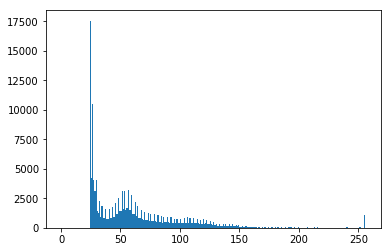

In [75]:
img = cv2.imread('legs_folder/24b/3-11-14.tif',0)
cv2.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [70]:
input_csv = pd.read_csv("data.csv")

In [73]:
FILE_EXTENSION = "tif"
dir_name = "legs_folder/"

img_hist = []
patient_ids = []
Y = []

for index, row in input_csv.iterrows():
    patient_id = str(row["patient_id"])
    file_1 = os.path.join(dir_name, patient_id, '.'.join((row["scan_1"], FILE_EXTENSION)))
    print(file_1)
    file_2 = os.path.join(dir_name, patient_id, '.'.join((row["scan_2"], FILE_EXTENSION)))
    
    if not (os.path.isfile(file_1) and os.path.isfile(file_2)):
        continue
    Y.append(row["y"])
    
    # Skip if the file does not exist (due to poor quality)
    
    patient_ids.append(patient_id)
    diff = baseline_hist_diff(file_1, file_2)
    img_hist.append(diff)

column_names = ["hist" + str(i) for i in range(256)]
df = pd.DataFrame(img_hist, columns=column_names, index=patient_ids)
df["y"] = Y
filtered_df = df.loc[:, (df != 0).any(axis=0)]
filtered_df.to_csv("data_text.csv", sep='\t')

legs_folder/3/1-25-17.tif
legs_folder/4/5-15-12.tif
legs_folder/4b/5-15-12.tif
legs_folder/6/10-23-14.tif
legs_folder/6/2-2-17.tif
legs_folder/6/11-16-17.tif
legs_folder/7/4-10-12.tif
legs_folder/7b/4-10-12.tif
legs_folder/8/3-19-13.tif
legs_folder/8/9-30-13.tif
legs_folder/8/3-4-14.tif
legs_folder/8/2-26-15.tif
legs_folder/8b/3-19-13.tif
legs_folder/8b/9-30-13.tif
legs_folder/8b/3-4-14.tif
legs_folder/8b/2-26-15.tif
legs_folder/9/3-9-16.tif
legs_folder/9/3-23-17.tif
legs_folder/11/5-22-12.tif
legs_folder/15/1-8-15.tif
legs_folder/15/3-24-16.tif
legs_folder/2/12-11-12.tif
legs_folder/16/9-4-12.tif
legs_folder/17/2-16-17.tif
legs_folder/18/12-11-15.tif
legs_folder/19/7-21-16.tif
legs_folder/21/8-6-15.tif
legs_folder/22/8-26-16.tif
legs_folder/22/8-26-16.tif
legs_folder/25/10-11-17.tif
legs_folder/1/8-16-12.tif
legs_folder/1/8-16-12.tif
legs_folder/1/11-20-13.tif
legs_folder/1/10-06-14.tif
legs_folder/1/10-05-15.tif
legs_folder/1/4-28-16.tif
legs_folder/12/5-29-12.tif
legs_folder/12/4-16

In [72]:
filtered_df

,hist0,hist1,hist2,hist3,hist4,hist5,hist6,hist7,hist8,hist9,...,hist247,hist248,hist249,hist250,hist251,hist252,hist253,hist254,hist255,y
4b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,7.0,3.0,4.0,13.0,-3.0,2.0,-373.0,I
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-2.0,-4.0,-12.0,-1.0,-3.0,0.0,-1.0,-83.0,I
7b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,50.0,I
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.0,-1.0,-6.0,-4.0,0.0,-6.0,-3.0,-9.0,-44.0,I
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.0,-1.0,-5.0,-4.0,-1.0,-6.0,-3.0,-9.0,-38.0,I
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,9.0,7.0,2.0,16.0,3.0,7.0,1.0,622.0,I
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.0,8.0,1.0,7.0,-2.0,0.0,2.0,-1.0,147.0,I
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.0,0.0,-2.0,-2.0,-7.0,4.0,-6.0,-2.0,-87.0,I
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-136.0,-138.0,-282.0,-136.0,-129.0,-136.0,-221.0,-142.0,-2430.0,I
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-16.0,-7.0,-5.0,-9.0,-11.0,-12.0,-4.0,-11.0,-407.0,I


### Attempting Interesting ORB points

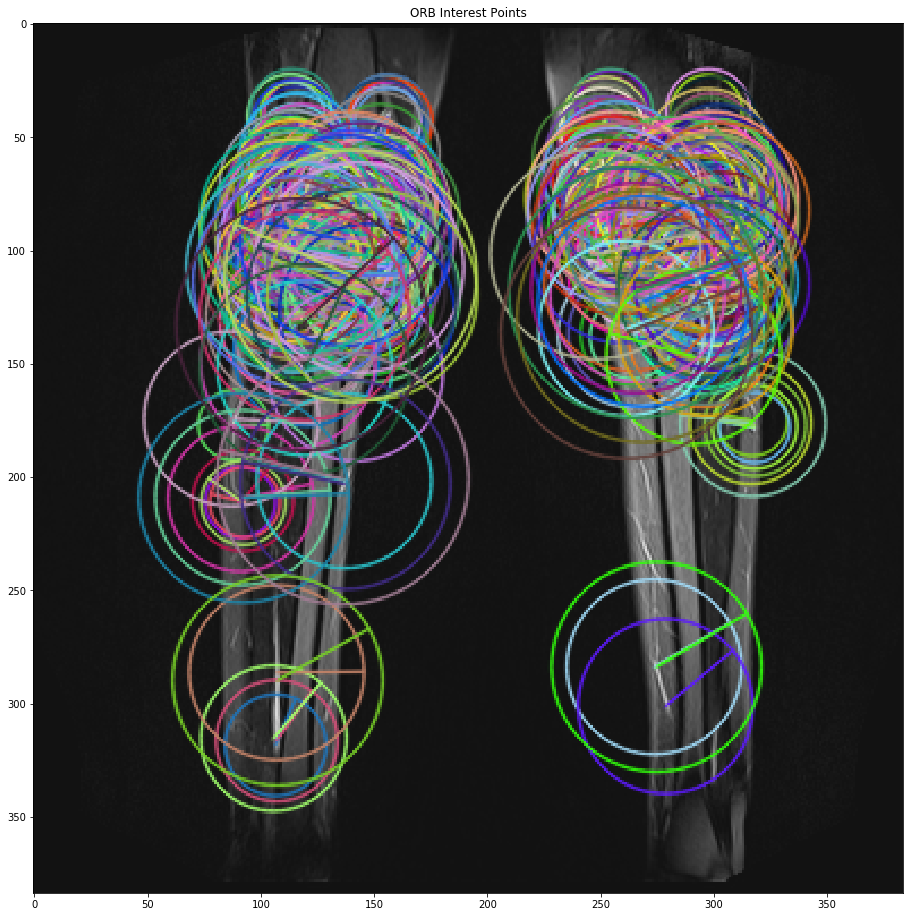

In [28]:
dataset_path = 'leg_only'
img_building = cv2.imread(os.path.join(dataset_path, '16-1.tif'))
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

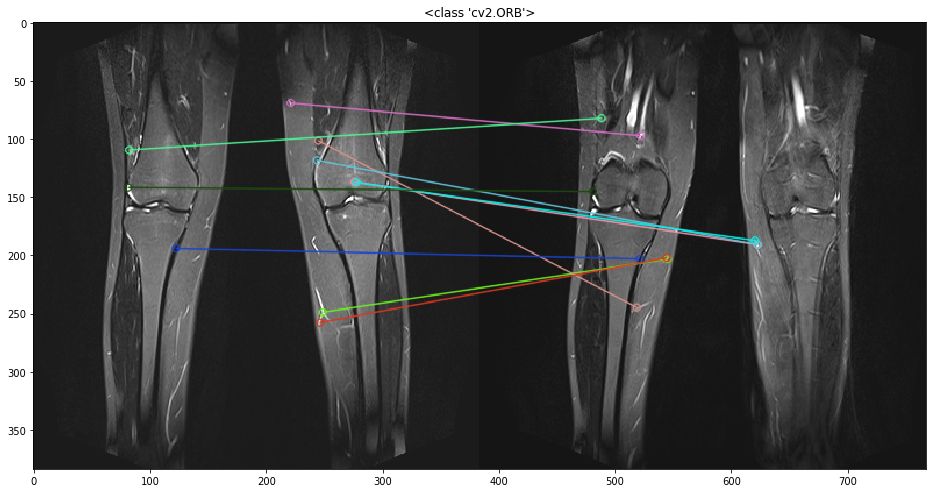

In [33]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches); plt.show()
    

orb = cv2.ORB_create()
draw_image_matches(orb, '7a-1.tif', '7a-2.tif')

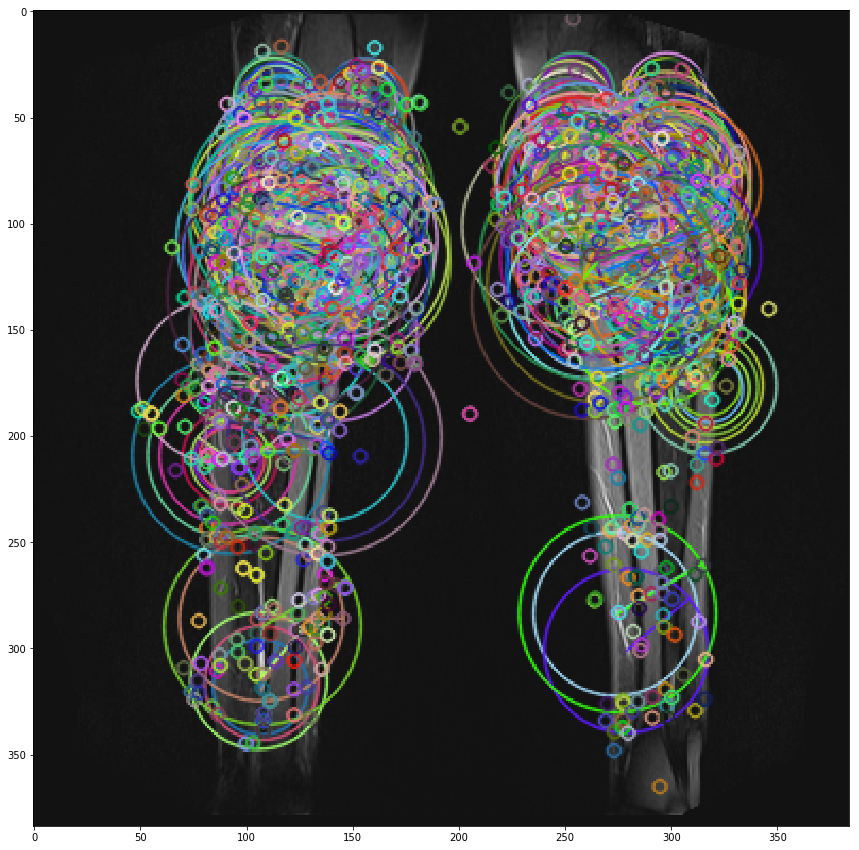

In [30]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img_building, None)
img_kp = cv2.drawKeypoints(img_building, kp, img_building)

plt.figure(figsize=(15, 15))
plt.imshow(img_kp); plt.show()